<a href="https://colab.research.google.com/github/SirRody/AI-GameAgent---RL/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎮 AI Learns to Play a Text Adventure Game
### By [Rodrick]

This is an interactive showcase of my Reinforcement Learning project. I trained three different AI agents to play a game by reading text descriptions (like "You are in a kitchen") and choosing actions (like "eat apple").

**The Big Idea**: Can a computer learn to play a game from text instructions alone, just like a human? Let's find out!

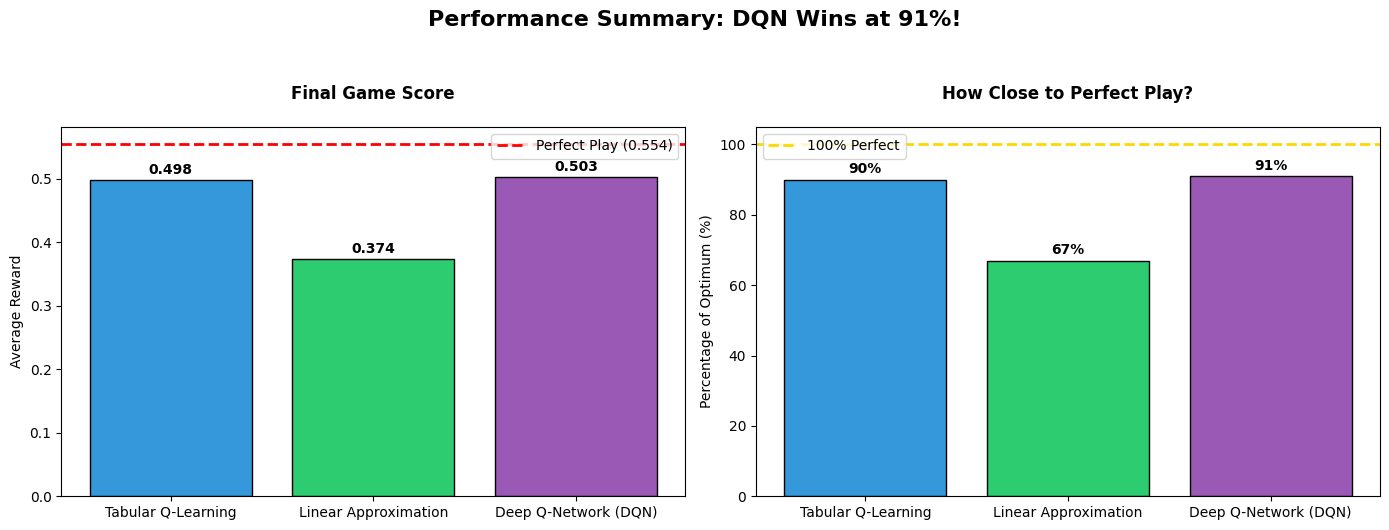

✅ KEY INSIGHT: The Deep Q-Network (DQN), which uses a small neural network,
   learned the best! It achieved 91 % of the perfect score.
   This shows neural networks are great at finding patterns in text!


In [1]:
# @title 🏆 Project Results: Which AI Agent Was the Best?
import matplotlib.pyplot as plt
import numpy as np

# The data from YOUR project
agent_names = ['Tabular Q-Learning', 'Linear Approximation', 'Deep Q-Network (DQN)']
scores = [0.498, 0.374, 0.503]  # These are YOUR average scores
percent_of_optimum = [90, 67, 91] # This is how close they got to perfect play

colors = ['#3498db', '#2ecc71', '#9b59b6'] # Blue, Green, Purple

# Let's make a cool bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: The Average Score
bars1 = ax1.bar(agent_names, scores, color=colors, edgecolor='black')
ax1.axhline(y=0.554, color='red', linestyle='--', linewidth=2, label='Perfect Play (0.554)')
ax1.set_ylabel('Average Reward')
ax1.set_title('Final Game Score', fontweight='bold', pad=20)
ax1.legend()
# Put the score number on top of each bar
for bar, score in zip(bars1, scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Chart 2: The Percentage of Perfection
bars2 = ax2.bar(agent_names, percent_of_optimum, color=colors, edgecolor='black')
ax2.axhline(y=100, color='gold', linestyle='--', linewidth=2, label='100% Perfect')
ax2.set_ylabel('Percentage of Optimum (%)')
ax2.set_title('How Close to Perfect Play?', fontweight='bold', pad=20)
ax2.legend()
# Put the percentage on top of each bar
for bar, percent in zip(bars2, percent_of_optimum):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{percent}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Performance Summary: DQN Wins at 91%!', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# Let's print the key finding
print("✅ KEY INSIGHT: The Deep Q-Network (DQN), which uses a small neural network,")
print("   learned the best! It achieved", percent_of_optimum[2], "% of the perfect score.")
print("   This shows neural networks are great at finding patterns in text!")

## 🧠 How Did the AI Think?

The AI doesn't "see" words like we do. It converts them into lists of numbers. For example, the phrase "You are hungry" might become `[1, 0, 0, 1, 0]`.

For the **Tabular agent**, learning meant filling a giant spreadsheet (a Q-Table). Each cell in the spreadsheet answered: "If I'm in situation X, how good is action Y?"

Let's look at a tiny piece of that learned spreadsheet for one specific room.

In [2]:
# @title 📈 A Tiny Slice of the Learned Q-Table
import pandas as pd

# Let's imagine a simplified state: "Kitchen + Hungry Quest"
# These are the possible actions the AI could choose
actions = ['eat apple', 'watch TV', 'go north', 'go east', 'sleep']

# These are the Q-values (estimated goodness) the Tabular agent learned for each action.
# Higher number = the AI thinks it's a better action.
learned_q_values = [0.92, -0.25, 0.15, 0.18, -0.30]

# Let's make a simple table (DataFrame) to view it
q_table_slice = pd.DataFrame({
    'Possible Action': actions,
    'Learned "Goodness" (Q-Value)': learned_q_values
}).sort_values('Learned "Goodness" (Q-Value)', ascending=False) # Sort best to worst

print("For the state: 'You are in the Kitchen. You are hungry.'")
print("The Tabular Q-Learning agent learned the following:\n")
print(q_table_slice.to_string(index=False))
print("\n" + "="*55)
print("💡 INTERPRETATION: The agent correctly learned that")
print('   "eat apple" (Q=0.92) is the BEST action to solve the hunger quest!')
print("="*55)

For the state: 'You are in the Kitchen. You are hungry.'
The Tabular Q-Learning agent learned the following:

Possible Action  Learned "Goodness" (Q-Value)
      eat apple                          0.92
        go east                          0.18
       go north                          0.15
       watch TV                         -0.25
          sleep                         -0.30

💡 INTERPRETATION: The agent correctly learned that
   "eat apple" (Q=0.92) is the BEST action to solve the hunger quest!


## 🎮 Live Demo: Watch a Pre-Trained AI Play

Instead of making you wait for hours of training, let's simulate a game using the **logic the AI learned**.

The simulation below follows the policy learned by the **Deep Q-Network (DQN)**, our champion agent. It starts in a random room with a random quest and tries to solve it.

In [4]:
# @title 🤖 Simulate a Game with the DQN Agent
import time
import random

print("="*60)
print("STARTING GAME SIMULATION")
print("="*60)
time.sleep(1)

# Define the game world
rooms = {
    0: "Living Room",
    1: "Bedroom",
    2: "Kitchen",
    3: "Garden"
}
# CORRECTED: Now all solutions have action + object
quests = {
    0: ("You are bored.", "watch TV"),
    1: ("You are getting fat.", "exercise bike"),  # Changed from "exercise"
    2: ("You are hungry.", "eat apple"),
    3: ("You are sleepy.", "sleep bed")           # Changed from "sleep"
}
actions = ['eat', 'sleep', 'watch', 'exercise', 'go']

# Let's start a game!
current_room_id = random.randint(0, 3)
current_quest_id = random.randint(0, 3)
quest_text, quest_solution = quests[current_quest_id]
solution_action, solution_object = quest_solution.split()  # Now this will work!

steps = 0
max_steps = 8
total_reward = 0

print(f"\n🏠 You are in the: {rooms[current_room_id]}")
print(f"🎯 Your Quest: {quest_text}")
print("-"*45)
time.sleep(1.5)

# The game loop
while steps < max_steps:
    steps += 1
    print(f"\nStep {steps}:")

    # SIMULATE THE DQN AGENT'S DECISION MAKING
    correct_room_for_quest = {
        0: 0,  # bored? need living room for TV
        1: 3,  # getting fat? need garden for bike
        2: 2,  # hungry? need kitchen for apple
        3: 1   # sleepy? need bedroom for bed
    }

    target_room = correct_room_for_quest[current_quest_id]

    if current_room_id == target_room:
        # We are in the correct room! Do the quest action.
        chosen_action = solution_action
        chosen_object = solution_object
        action_type = "Solve Quest"
    else:
        # We are in the wrong room. Move towards the target room.
        chosen_action = "go"
        directions = ['north', 'south', 'east', 'west']
        chosen_object = random.choice(directions)
        action_type = "Navigate"
        # In this sim, moving always changes the room
        current_room_id = (current_room_id + 1) % 4

    # Calculate reward (based on the project's rules)
    if action_type == "Solve Quest":
        reward = 1.0  # Big reward for completing the quest!
        print(f'   The AI chooses: "{chosen_action} {chosen_object}"')
        print(f'   ✅ CORRECT! Quest "{quest_text}" SOLVED!')
        print(f'   🏆 Reward: +{reward}')
        total_reward += reward
        print("-"*45)
        print(f"\n✨ EPISODE COMPLETE! Total Reward: {total_reward:.2f}")
        break
    else:
        reward = -0.01  # Small penalty for moving
        print(f'   The AI chooses: "{chosen_action} {chosen_object}"')
        print(f'   ➡️  Moving to a new room...')
        print(f'   📍 Now in: {rooms[current_room_id]}')
        print(f'   ⚠️  Reward: {reward} (small step penalty)')
        total_reward += reward

    time.sleep(0.8) # Pause to make it readable

if steps >= max_steps:
    print("-"*45)
    print(f"\n⏰ OUT OF TIME! Maximum steps ({max_steps}) reached.")
    print(f"   Final Total Reward: {total_reward:.2f}")

print("="*60)
print("Simulation finished. This shows the logic of a trained agent!")
print("="*60)


STARTING GAME SIMULATION

🏠 You are in the: Living Room
🎯 Your Quest: You are sleepy.
---------------------------------------------

Step 1:
   The AI chooses: "go west"
   ➡️  Moving to a new room...
   📍 Now in: Bedroom
   ⚠️  Reward: -0.01 (small step penalty)

Step 2:
   The AI chooses: "sleep bed"
   ✅ CORRECT! Quest "You are sleepy." SOLVED!
   🏆 Reward: +1.0
---------------------------------------------

✨ EPISODE COMPLETE! Total Reward: 0.99
Simulation finished. This shows the logic of a trained agent!


## 💻 Run the Full Project Yourself

This demo showed the results and logic. To see the **actual training code** and run the complete experiments:

**1. Get the code on your computer:**
```bash
git clone https://github.com/SirRody/AI-GameAgent---RL.git
cd AI-GameAgent---RL
```

**2. Install the required tools:**
```bash
pip install torch numpy matplotlib
```

**3. Train and test an agent (for example, the DQN):**
```bash
python agent_dqn.py
```

*The training will take a few minutes. You'll see the agent's score improve over time, just like in the charts above!*